# Classification of Niño / Niña periods

In [1]:
%pylab inline
import os
import downglacier.sandbox.tcd_utils as utils
import seaborn as sns
from scipy.ndimage.measurements import label as label_region
from scipy.ndimage.measurements import find_objects
pal = sns.color_palette('pastel')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.2)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'downglacier'

In [2]:
lag=3

In [3]:
df = utils.get_enso_df(lag=lag)

In [4]:
r, nr = label_region(df['is_nino'])
[len(r[o]) for o in find_objects(r)]

[13, 17, 15, 8, 12, 10, 10, 10]

In [5]:
r, nr = label_region(df['is_nina'])
[len(r[o]) for o in find_objects(r)]

[31, 18, 9, 33, 12, 10, 8]

In [8]:
print('nyears: {}'.format(len(df['is_neutral']) / 12))
print('is_neutral: {}'.format(np.sum(df['is_neutral'])))
print('is_nino: {}'.format(np.sum(df['is_nino'])))
print('is_nina: {}'.format(np.sum(df['is_nina'])))
nmo = len(df['is_neutral'])
print('is_neutral: {:.0f}'.format(np.sum(df['is_neutral'])/nmo * 100.))
print('is_nino: {:.0f}'.format(np.sum(df['is_nino'])/nmo * 100.))
print('is_nina: {:.0f}'.format(np.sum(df['is_nina'])/nmo * 100.))

nyears: 34.0
is_neutral: 192
is_nino: 95
is_nina: 121
is_neutral: 47
is_nino: 23
is_nina: 30


In [7]:
bp = utils.get_sst_baseplot(lag=lag)

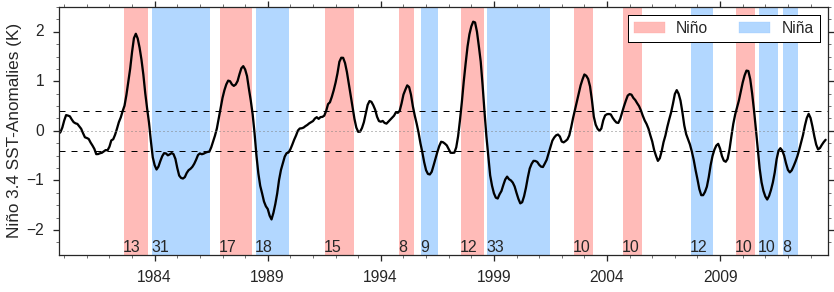

In [8]:
fig = plt.figure(figsize=(12, 4), dpi=200)
ax = fig.add_subplot(111)

plt.plot(bp['xtime'], df['sst'], color='k')
plt.ylim([-2.5,2.5])
plt.xlim([0, bp['nx']])

import matplotlib.collections as collections
span_where = collections.BrokenBarHCollection.span_where
c = span_where(bp['tspans'], ymin=-2.5, ymax=2.5, where=bp['isnino'], color=pal[2], alpha=0.7, linewidths=0)
ax.add_collection(c)
c = span_where(bp['tspans'], ymin=-2.5, ymax=2.5, where=bp['isnina'], color=pal[0], alpha=0.7, linewidths=0)
ax.add_collection(c)

r1, _ = label_region(bp['isnino'])
r2, _ = label_region(df['is_nino'])
for o1, o2 in zip(find_objects(r1), find_objects(r2)):
    plt.text(bp['tspans'][o1][0], -2.45, '{}'.format(len(r[o2])), size=16)
    
r1, _ = label_region(bp['isnina'])
r2, _ = label_region(df['is_nina'])
for o1, o2 in zip(find_objects(r1), find_objects(r2)):
    plt.text(bp['tspans'][o1][0], -2.45, '{}'.format(len(r[o2])), size=16)

from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_ticks(bp['majorTickPos'])
ax.xaxis.set_ticks(bp['minorTickPos'], minor=True)
ax.set_xticklabels(bp['majorTickNames'])

plt.axhline(0, linewidth=1, color='grey', linestyle =':')
plt.axhline(0.4, linewidth=1, color='k', linestyle ='--')
plt.axhline(-0.4, linewidth=1, color='k', linestyle ='--')

plt.subplots_adjust(left=0.08, right=0.97, top=0.96, bottom=0.1)

import matplotlib.patches as mpatches
pat1 = mpatches.Patch(color=pal[2], alpha=0.7, label=u'Niño')
pat2 = mpatches.Patch(color=pal[0], alpha=0.7, label=u'Niña')
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = 'True'
legend = plt.legend(handles=[pat1,pat2], loc='upper right', ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

ax.xaxis.grid(False)

ax.set_ylabel(u'Niño 3.4 SST-Anomalies (K)') 
plt.savefig(os.path.join(utils.get_plot_dir(), 'Fig_02.pdf'))